# Comp 6934 Winter 2025 Note 7

### Scatter, Line and Bar plots

These notes are modified from notes by Dr. Terrance Tricco.

by E Brown.

We're going to start considering basic ideas about choosing the right visual for a data problem by looking at three common plot types

- Line plots
- Scatter plots
- Bar plots 

Data taken from:
* https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset

Matplotlib API: https://matplotlib.org/stable/api/index.html

API for different Axes plot types can be found here:\
https://matplotlib.org/stable/api/axes_api.html#plotting



## Load Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

We shall load our trending YouTube video data set that we have been working with.

In [4]:
df = pd.read_csv('datasets/CA_videos.csv', parse_dates=['trending_date', 'publish_time'])

## Line Plots 

Line plots are great for looking at **trends** between two variables.

Although not required:
* The x-axis (independent variable) tends to be evenly spaced values, trending from left to right.
* Often time-based observations or data points with time on the x-axis

Matplotlib - .plot(x, y)

Matplotlib line plots can be created using ``.plot(x, y)``. We have looked at line plots in previous lectures.

Perceptual cues
* Our perception is good at detecting the angle of a line (slope) which is one thing that makes trends visible on a line plot
* You can change the slope of lines by stretching or changing the aspect ratio of the plot. More apparent slope will make the tread appear "faster" to the viewer

More considerations
* Lines between points are usually straight, but can be curves or splines

* Multiseries can be shown connecting related series values with lines between consecutive data points
* color and marker styles can be used to distinguish different series

* Generally, you want to avoid too much clutter on a plot, but you can also highlight some points or seires to make them stand out from the clutter, as in the following examples
* By hilighting some points you are choosing or biasing what is important rather than letting the viewer explore this on their own. 

![](https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-eu.s3.amazonaws.com%2Fa355ac54-b2af-11e8-8d14-6f049d06439c?source=next-article&fit=scale-down&quality=highest&width=700&dpr=1)

Taken from Financial Times https://www.ft.com/content/3464a154-b27f-11e8-8d14-6f049d06439c

![](https://i0.wp.com/www.edwardconard.com/wp-content/uploads/2023/08/Sea-Ice-Economist.png?fit=1106%2C792&ssl=1)

Taken from https://www.economist.com/graphic-detail/2023/08/02/the-rapid-loss-of-antarctic-sea-ice-brings-grim-scenarios-into-view

## Scatter Plots - .scatter(x, y)

Scatter plots are useful for looking at the **relationship** between two variables.

* You can categorize points with color and/or marker styles
* Marker size is also usable for another dimension but should be used carefully.
    * Scatter plots often reveal how the data tend to group or cluster with in the axes space. . This works best if the markers are all the same size.
* x-axis is still usually the independent variable, but will often the value will not be evenly spaced or controlled.

### Matplotlin scatter plots

Let's look at multiple videos for top trending channels.

First, let's find the top channels based on number of videos that went trending. In this case, we create a secondary DataFrame, `df_videocounts`, to store this information. Importantly, we use ``drop_duplicates()`` to remove multiple entries of a video so that each video is only represented once. This gives an accurate count on the number of trending videos published by a channel.

In [5]:
df_videocounts = df[['video_id', 'channel_title']].drop_duplicates().groupby('channel_title').count().reset_index().sort_values(by='video_id', ascending=False)

The top 4 channels are just the top 4 rows of our secondary DataFrame, `df_videocounts`.

In [6]:
top_channels = df_videocounts['channel_title'].head(4)

In [7]:
top_channels

2116            NBA
2652      SPORTSNET
657     DAZN Canada
987       FORMULA 1
Name: channel_title, dtype: object

Text(0, 0.5, 'Comments')

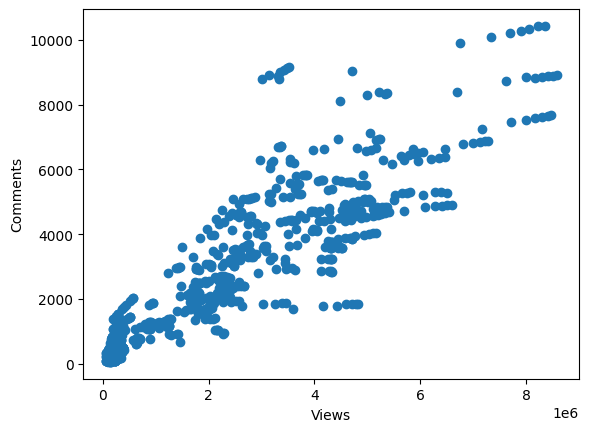

In [8]:
fig, ax = plt.subplots()

ax.scatter(df[df.channel_title.isin(top_channels)].views, df[df.channel_title.isin(top_channels)].comment_count)

ax.set_xlabel('Views')
ax.set_ylabel('Comments')

Text(0, 0.5, 'Comments')

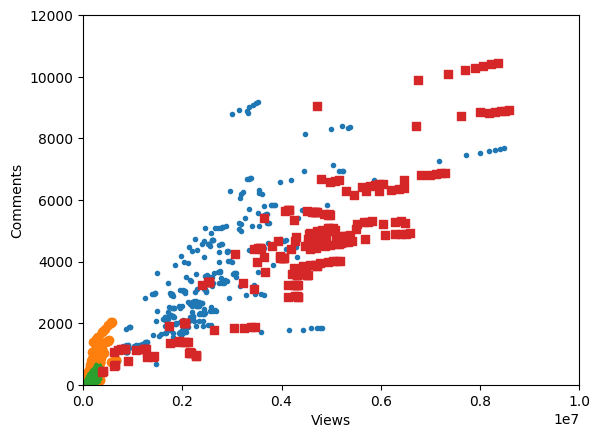

In [9]:
fig, ax = plt.subplots()

ax.scatter(df[df.channel_title == 'NBA'].views, df[df.channel_title == 'NBA'].comment_count, marker='.')
ax.scatter(df[df.channel_title == 'SPORTSNET'].views, df[df.channel_title == 'SPORTSNET'].comment_count, marker='o')
ax.scatter(df[df.channel_title == 'DAZN Canada'].views, df[df.channel_title == 'DAZN Canada'].comment_count, marker='^')
ax.scatter(df[df.channel_title == 'FORMULA 1'].views, df[df.channel_title == 'FORMULA 1'].comment_count, marker='s')

ax.set_xlim((0, 1e7))
ax.set_ylim((0, 12000))
ax.set_xlabel('Views')
ax.set_ylabel('Comments')

## Scatter Plots Example 2

Scatter plots can work well with Line plots, depending on the story to tell with your data.

Let's look at a few videos that were trending for multiple days. 

How can we determine how many days a video went trending for? A simple way is to use ``.value_counts()``.

In [10]:
df['video_id'].value_counts()

video_id
rwGpzW8xz-U    12
-VSq4JcmCCI    12
Km5dhtguybM    11
UUKdUNMgk7Q    11
w1-jss2mZlY    11
               ..
6ZwBHQH61QU     1
B-HF-wBwQsc     1
FyJUNqBHxd8     1
P_x5JmRcV8k     1
Dl0McRU95js     1
Name: count, Length: 13191, dtype: int64

Let's create a scatter plot of the 4 videos with the longest number of trending days.

Text(0, 0.5, 'Likes')

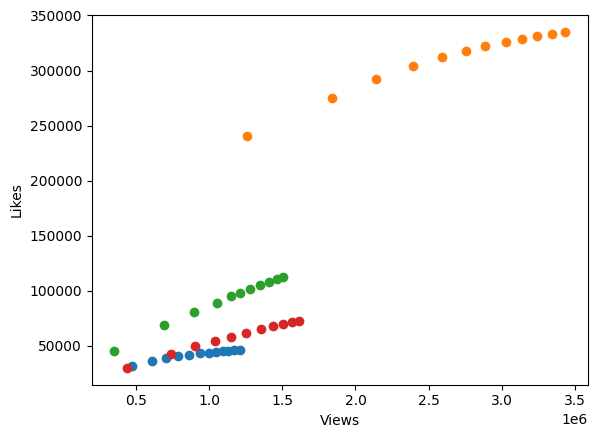

In [11]:
fig, ax = plt.subplots()

ax.scatter(df[df.video_id == '-VSq4JcmCCI'].views, df[df.video_id == '-VSq4JcmCCI'].likes)
ax.scatter(df[df.video_id == 'rwGpzW8xz-U'].views, df[df.video_id == 'rwGpzW8xz-U'].likes)
ax.scatter(df[df.video_id == 'Km5dhtguybM'].views, df[df.video_id == 'Km5dhtguybM'].likes)
ax.scatter(df[df.video_id == '5rK_gR6MvL0'].views, df[df.video_id == '5rK_gR6MvL0'].likes)

ax.set_xlabel('Views')
ax.set_ylabel('Likes')

We can also adjust the style or size of the points in the scatter plot. 

The ``marker=`` keyword allows the user to change the shape of the points. They are circles by default. There are many other options, such as triangles, squares, stars, etc. A full list is available at:\
https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers

The ``s=`` keyword is used to change the size of points. Specifying a number will change the size of all points to that number. Can also specify a list of values to change the size of points on an individual basis.

Text(0, 0.5, 'Likes')

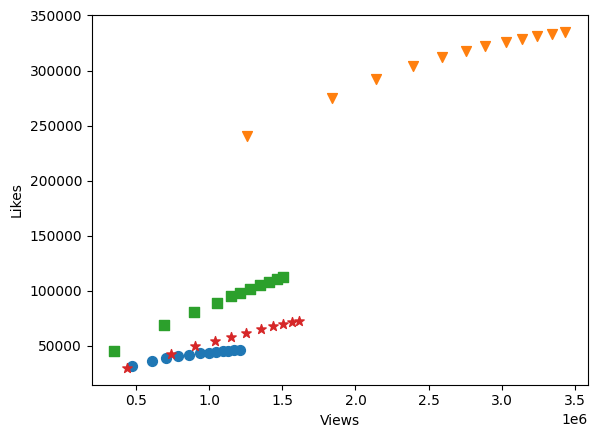

In [12]:
fig, ax = plt.subplots()

ax.scatter(df[df.video_id == '-VSq4JcmCCI'].views, df[df.video_id == '-VSq4JcmCCI'].likes, s=50, marker='o')
ax.scatter(df[df.video_id == 'rwGpzW8xz-U'].views, df[df.video_id == 'rwGpzW8xz-U'].likes, s=50, marker='v')
ax.scatter(df[df.video_id == 'Km5dhtguybM'].views, df[df.video_id == 'Km5dhtguybM'].likes, s=50, marker='s')
ax.scatter(df[df.video_id == '5rK_gR6MvL0'].views, df[df.video_id == '5rK_gR6MvL0'].likes, s=50, marker='*')

ax.set_xlabel('Views')
ax.set_ylabel('Likes')

There is sometimes a lot of synergy between scatter plots and line plots. The line plot highlights the trend, and the scatter plot highlights the underlying data.

Text(0, 0.5, 'Likes')

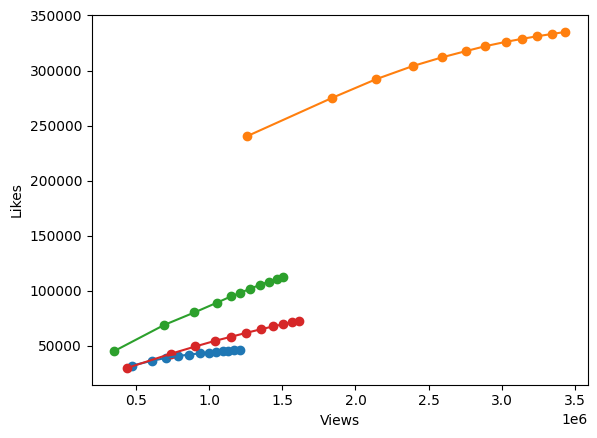

In [24]:
fig, ax = plt.subplots()

ax.scatter(df[df.video_id == '-VSq4JcmCCI'].views, df[df.video_id == '-VSq4JcmCCI'].likes)
ax.scatter(df[df.video_id == 'rwGpzW8xz-U'].views, df[df.video_id == 'rwGpzW8xz-U'].likes)
ax.scatter(df[df.video_id == 'Km5dhtguybM'].views, df[df.video_id == 'Km5dhtguybM'].likes)
ax.scatter(df[df.video_id == '5rK_gR6MvL0'].views, df[df.video_id == '5rK_gR6MvL0'].likes)

ax.plot(df[df.video_id == '-VSq4JcmCCI'].views, df[df.video_id == '-VSq4JcmCCI'].likes)
ax.plot(df[df.video_id == 'rwGpzW8xz-U'].views, df[df.video_id == 'rwGpzW8xz-U'].likes)
ax.plot(df[df.video_id == 'Km5dhtguybM'].views, df[df.video_id == 'Km5dhtguybM'].likes)
ax.plot(df[df.video_id == '5rK_gR6MvL0'].views, df[df.video_id == '5rK_gR6MvL0'].likes)

ax.set_xlabel('Views')
ax.set_ylabel('Likes')

## From the web...

![](images/income.png)

Taken from https://www.npr.org/sections/money/2015/02/11/384988128/the-fall-and-rise-of-u-s-inequality-in-2-graphs

## Bar Plots

Bar plots allow comparison between multiple items.

They are usually bars for categorical data rather than numberical data
* Each bar is a category
* Numerical data can be devided or re-coded into categories (like age groups)
They are best for showing comparative value
* Note that the size of the bar and the top of the bar are two visual representations of the same value.
* Area/size of the bar can give a general impression of absolute value of category
    * Starting the bar at a non-zero value can give an invalid impression of the rela+tive value of the categories
* Top of the bar allows very fine comparison of close values (better than x-y axes if the bars are close to each other) 

### Matplotlib

They can be created using ``.bar(labels, values)`` for vertical bar plots, or ``.barh(labels, values)`` for horizontal bar plots.

Let's plot the number of videos by top trending channels. We can reuse `df_videocounts`, as it has this information.

In [25]:
top10_channels = df_videocounts.head(10)

Text(0.5, 1.0, 'Unique Number of Trending Videos')

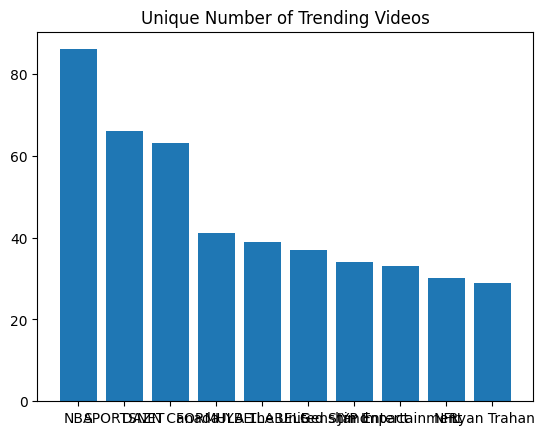

In [26]:
fig, ax = plt.subplots()

ax.bar(top10_channels.channel_title, top10_channels.video_id)

ax.set_title('Unique Number of Trending Videos')

Our labels are hard to read because they overlap. There are many ways to deal with this problem. One option is to change the orientation of the bar plot, using `.barh()` instead of `.bar()`

Text(0.5, 1.0, 'Unique Number of Trending Videos')

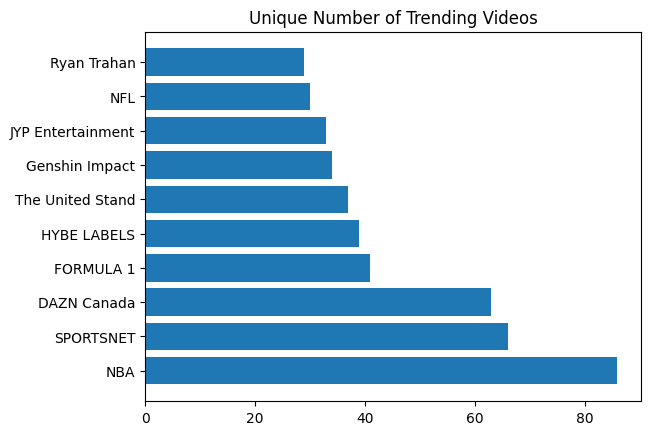

In [27]:
fig, ax = plt.subplots()

ax.barh(top10_channels.channel_title, top10_channels.video_id)

ax.set_title('Unique Number of Trending Videos')

It is often better to sort bar plots from the largest value to the smallest value, which we can do by sorting the data itself before plotting.

In [28]:
top10_channels = top10_channels.sort_values(by='video_id')

Text(0.5, 1.0, 'Unique Number of Trending Videos')

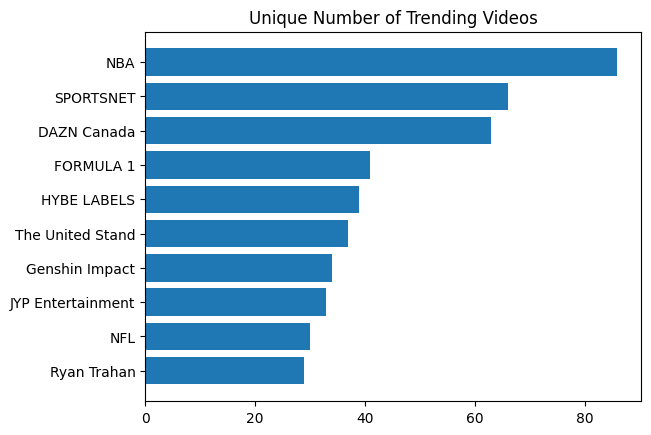

In [29]:
fig, ax = plt.subplots()

ax.barh(top10_channels.channel_title, top10_channels.video_id)

ax.set_title('Unique Number of Trending Videos')

## Matplotlib plot types

Explore other plot types at https://matplotlib.org/stable/api/axes_api.html#plotting

And a gallery of examples at https://matplotlib.org/stable/gallery/index.html